In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Lapi-ITB\olympics.csv",skiprows=1, skipfooter=1)

In [3]:
df.head(10)

,Unnamed: 0,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain (BRN),8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In [4]:
df.rename(columns = {'Unnamed: 0': 'Countries',
          '№ Summer': 'Number of Summer Games',
          '01 !': 'Gold Medal (S)',
          '02 !': 'Silver Medal (S)',
          '03 !': 'Bronze Medal (S)',
          'Total': 'Total (S)',
          '№ Winter': 'Number of Winter Games',
          '01 !.1': 'Gold Medal (W)',
          '02 !.1': 'Silver Medal (W)',
          '03 !.1': 'Bronze Medal (W)',
          'Total.1': 'Total (W)',
          '№ Games': 'Total Games',
          '01 !.2': 'Gold Medal (T)',
          '02 !.2': 'Silver Medal (T)',
          '03 !.2': 'Bronze Medal (T)',
          'Combined total': 'Total Medal'},
          inplace = True)

In [5]:
df

,Countries,Number of Summer Games,Gold Medal (S),Silver Medal (S),Bronze Medal (S),Total (S),Number of Winter Games,Gold Medal (W),Silver Medal (W),Bronze Medal (W),Total (W),Total Games,Gold Medal (T),Silver Medal (T),Bronze Medal (T),Total Medal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [6]:
# Splitting Country with its Country Code

new_country = df['Countries'].str.split('(', n = 1, expand = True)
country_code = new_country[1].str.split(')', n = 1, expand = True)

df['Countries'] = new_country[0]
df.insert(1, 'Code', country_code[0].values)

In [7]:
df

,Countries,Code,Number of Summer Games,Gold Medal (S),Silver Medal (S),Bronze Medal (S),Total (S),Number of Winter Games,Gold Medal (W),Silver Medal (W),Bronze Medal (W),Total (W),Total Games,Gold Medal (T),Silver Medal (T),Bronze Medal (T),Total Medal
0,Afghanistan,AFG,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,ALG,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,ARG,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,ARM,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,ANZ,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia,YUG,16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants,IOP,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia,ZAM,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe,ZIM,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


In [8]:
#Splitting Data

df_summer = df[['Countries','Number of Summer Games', 'Gold Medal (S)', 'Silver Medal (S)', 'Bronze Medal (S)', 'Total (S)']]
df_summer.rename(columns = {'Number of Summer Games': 'Number of Games',
                     'Gold Medal (S)': 'Gold Medal',
                     'Silver Medal (S)': 'Silver Medal',
                     'Bronze Medal (S)': 'Bronze Medal',
                     'Total (S)': 'Total'}, inplace = True)
df_summer['Type Games'] = ['Summer' for x in np.arange(0,len(df['Countries']))]

df_winter = df[['Countries','Number of Winter Games', 'Gold Medal (W)', 'Silver Medal (W)', 'Bronze Medal (W)', 'Total (W)']]
df_winter.rename(columns = {'Number of Winter Games': 'Number of Games',
                     'Gold Medal (W)': 'Gold Medal',
                     'Silver Medal (W)': 'Silver Medal',
                     'Bronze Medal (W)': 'Bronze Medal',
                     'Total (W)': 'Total'}, inplace = True)
df_winter['Type Games'] = ['Winter' for x in np.arange(0,len(df['Countries']))]

In [9]:
#Concating Data

df_olympic = pd.concat([df_summer, df_winter]).sort_values(by=['Countries','Type Games'])

In [11]:
df_olympic

,Countries,Number of Games,Gold Medal,Silver Medal,Bronze Medal,Total,Type Games
0,Afghanistan,13,0,0,2,2,Summer
0,Afghanistan,0,0,0,0,0,Winter
1,Algeria,12,5,2,8,15,Summer
1,Algeria,3,0,0,0,0,Winter
2,Argentina,23,18,24,28,70,Summer
...,...,...,...,...,...,...,...
141,Yugoslavia,14,0,3,1,4,Winter
143,Zambia,12,0,1,1,2,Summer
143,Zambia,0,0,0,0,0,Winter
144,Zimbabwe,12,3,4,1,8,Summer


In [15]:
df_olympic_sum = df_olympic.groupby('Countries').sum().reset_index()

In [46]:
df_top_ten = df_olympic_sum.sort_values(by='Total', ascending=False).head(10)

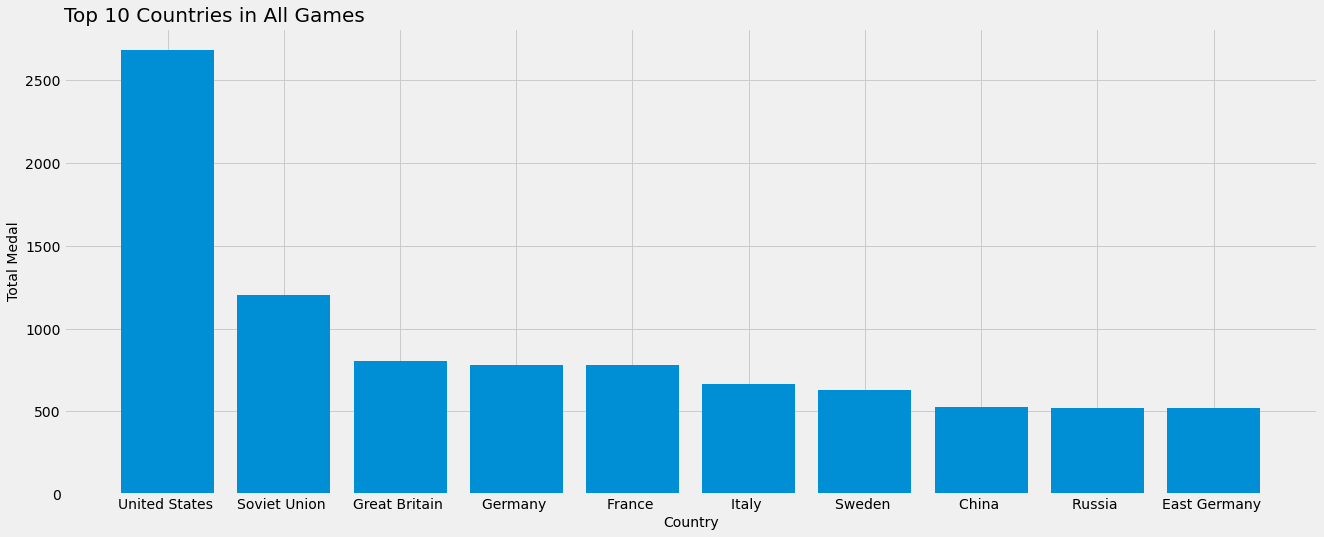

In [70]:
# Olympic ranking by total medal

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.bar(np.arange(len(df_top_ten['Total'])), df_top_ten['Total'])
plt.xticks(np.arange(len(df_top_ten['Countries'])), df_top_ten['Countries'])
plt.title('Top 10 Countries in All Games', fontsize=20, loc='left')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medal', fontsize=14)
plt.show()

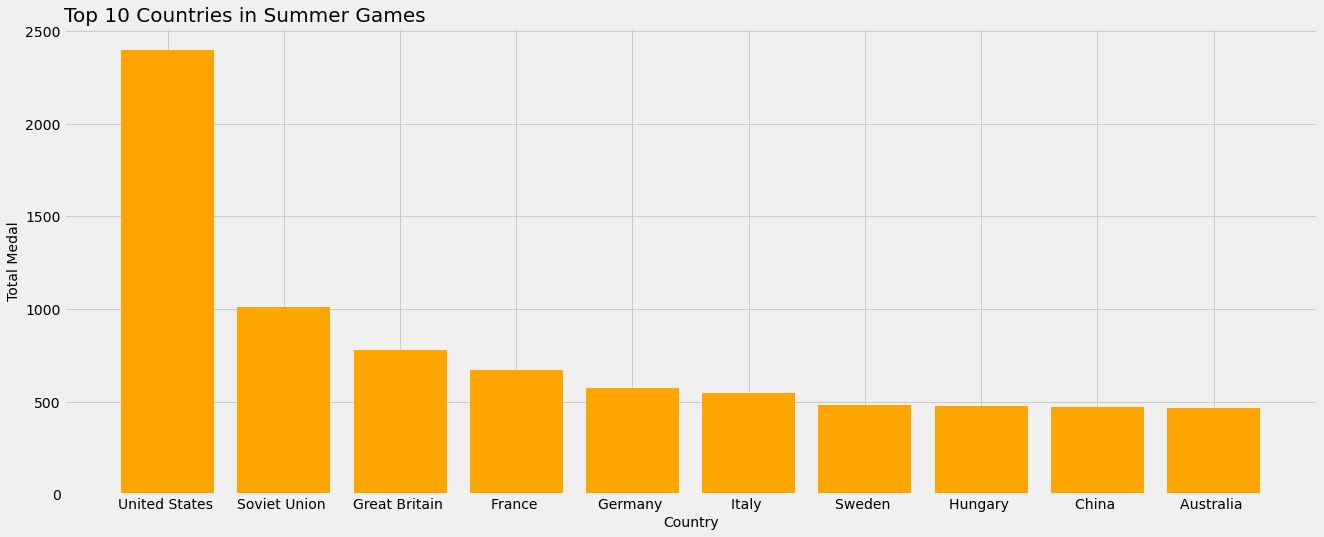

In [90]:
df_top_s = df_summer.sort_values(by='Total', ascending=False).head(10)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.bar(np.arange(len(df_top_s['Total'])), df_top_s['Total'], color='orange')
plt.xticks(np.arange(len(df_top_s['Countries'])), df_top_s['Countries'])
plt.title('Top 10 Countries in Summer Games', fontsize=20, loc='left')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medal', fontsize=14)
plt.show()

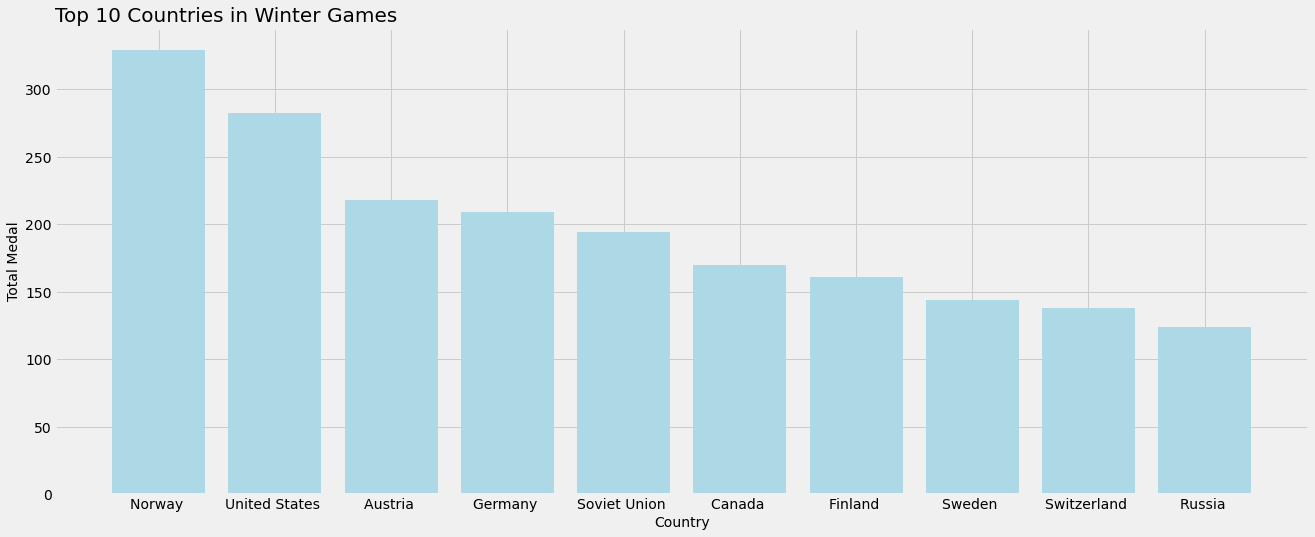

In [83]:
df_top_w = df_winter.sort_values(by='Total', ascending=False).head(10)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.bar(np.arange(len(df_top_w['Total'])), df_top_w['Total'], color='lightblue')
plt.xticks(np.arange(len(df_top_w['Countries'])), df_top_w['Countries'])
plt.title('Top 10 Countries in Winter Games', fontsize=20, loc='left')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medal', fontsize=14)
plt.show()